<a href="https://colab.research.google.com/github/Han8000/gkstmddn/blob/main/yoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 1. YOLOv8 설치
!pip install ultralytics --upgrade -q
from ultralytics import YOLO
import torch

# 2. Roboflow에서 데이터셋 다운로드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mgXBQXcwwSYziI1P1dSr")  # <- 당신의 API 키
project = rf.workspace("facerecogniton").project("face-jjvtf")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [14]:
# 3. YOLOv8 Keypoint 모델 학습
model = YOLO("yolov8n-pose.yaml")  # small 모델은 yolov8s-pose.yaml

model.train(
    data="/content/FACE-1/data.yaml",
    epochs=50,
    imgsz=640,
    device=0  # GPU 사용
)

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.yaml, data=/content/FACE-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 78.3MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[7, 3]

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.0MB/s]


AMP: checks passed ✅


train: Scanning /content/FACE-1/train/labels... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<00:00, 467.96it/s]

train: New cache created: /content/FACE-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/FACE-1/valid/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 153.40it/s]

val: New cache created: /content/FACE-1/valid/labels.cache


Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.455G      3.002      6.159        0.8      4.235      4.351          6        640: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          1          1    0.00333          1     0.0063    0.00352          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.459G      3.651      6.079     0.7365      4.958      4.372          3        640: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all          1          1    0.00333          1    0.00575    0.00278          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.467G      3.127      5.512     0.7012      4.255      4.316          8        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          1          1    0.00333          1    0.00711    0.00382          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.473G      3.204      6.906     0.7104      3.873      4.171          7        640: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.52it/s]

                   all          1          1    0.00333          1    0.00575    0.00278          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.479G      3.316       6.07     0.7476      4.172      4.512          9        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.50it/s]

                   all          1          1    0.00333          1     0.0063    0.00352          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.484G      3.419      3.648     0.7029      4.718      4.158          3        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.14it/s]

                   all          1          1    0.00333          1    0.00575    0.00278          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.521G      3.045      5.677     0.7319      4.984      4.313          3        640: 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.36it/s]

                   all          1          1    0.00333          1     0.0063    0.00352          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.539G      3.504      3.928     0.6947      4.727      4.154          3        640: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all          1          1    0.00333          1    0.00575    0.00287          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.559G      2.608        4.3     0.6901      4.115      4.176          7        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.40it/s]

                   all          1          1    0.00333          1     0.0079    0.00434          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.576G       3.54      6.057     0.6986      4.203      4.154          6        640: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.86it/s]

                   all          1          1    0.00333          1    0.00701    0.00385          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.594G      3.307      6.163     0.6891      4.533      4.131          4        640: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all          1          1    0.00333          1     0.0079    0.00419          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.611G      3.921      5.571     0.6923      4.152      4.159          7        640: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.72it/s]

                   all          1          1    0.00333          1     0.0079    0.00424          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.631G      3.324      5.626     0.7095      4.105      4.298         10        640: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]

                   all          1          1    0.00333          1    0.00771    0.00435          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.646G      3.635      5.411     0.7364      4.714      4.767          6        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.01it/s]

                   all          1          1    0.00333          1     0.0079    0.00419          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.666G      3.237      5.069     0.6886      4.355      4.242          7        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.95it/s]

                   all          1          1    0.00333          1     0.0079    0.00424          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.682G      2.775      4.071      0.704      4.447      4.127          5        640: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.38it/s]

                   all          1          1    0.00333          1    0.00701    0.00336          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.699G       3.35      5.895     0.7088      4.225      4.169          5        640: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.67it/s]

                   all          1          1    0.00333          1    0.00553    0.00268          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.719G      3.722      4.267     0.7204      4.704      4.452          7        640: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.03it/s]

                   all          1          1    0.00333          1    0.00553    0.00268          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.746G      3.836      4.853     0.7159      3.999      4.226          9        640: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.20it/s]

                   all          1          1    0.00333          1    0.00553    0.00273          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.752G      2.841       6.39     0.7268      4.445      4.502          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.96it/s]

                   all          1          1    0.00333          1    0.00553    0.00273          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.781G      2.762      5.875     0.7062      4.317      4.421          6        640: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          1          1    0.00333          1    0.00638    0.00352          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.789G      3.367      5.023     0.6981      3.964      4.113          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.95it/s]

                   all          1          1    0.00333          1    0.00638    0.00352          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.816G      3.503      3.532     0.6852      4.549      4.097          5        640: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          1          1    0.00333          1    0.00544    0.00316          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.822G      3.308      4.189     0.8097      4.897      4.424          3        640: 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all          1          1    0.00333          1    0.00544    0.00316          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.852G      2.792      5.767      0.666      4.254      4.159          4        640: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.34it/s]

                   all          1          1    0.00333          1    0.00618     0.0034          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.859G      2.929      5.473     0.6885      3.749      4.153          9        640: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.54it/s]

                   all          1          1    0.00333          1    0.00618     0.0034          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.887G      3.346      4.299     0.6988      4.145       4.14          5        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.75it/s]

                   all          1          1    0.00333          1    0.00618    0.00368          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.893G      3.114      4.947     0.7299       4.41       4.11          3        640: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.29it/s]

                   all          1          1    0.00333          1    0.00618    0.00368          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.922G      3.437      4.821     0.6781      4.166      4.197          5        640: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.15it/s]

                   all          1          1    0.00333          1    0.00562    0.00311          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50      0.93G      2.387       6.24     0.6553      4.419      4.219          4        640: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.25it/s]

                   all          1          1    0.00333          1    0.00562    0.00311          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.959G      3.139      3.844     0.7205      3.935      4.121          7        640: 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.65it/s]

                   all          1          1    0.00333          1     0.0063    0.00356          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.965G       3.14      5.364     0.6866      4.078      4.101          5        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all          1          1    0.00333          1     0.0063    0.00356          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.992G      2.672      5.983      0.757       4.01      4.295          4        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]

                   all          1          1    0.00333          1    0.00569    0.00331          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50         1G      3.314      4.169     0.7028      3.797      4.188          8        640: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.06it/s]

                   all          1          1    0.00333          1    0.00569    0.00331          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.03G      3.296      5.886     0.7098      4.214      4.136          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]

                   all          1          1    0.00333          1    0.00556    0.00323          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.04G      2.808      5.246     0.6872       4.16      4.129          5        640: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]

                   all          1          1    0.00333          1    0.00556    0.00323          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.06G      3.143      4.147     0.6921      4.025       4.13          4        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.18it/s]

                   all          1          1    0.00333          1    0.00562    0.00327          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.07G      3.475      4.305     0.7063      3.752      4.133          9        640: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.30it/s]

                   all          1          1    0.00333          1    0.00562    0.00327          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.1G      3.855      3.944     0.6828      4.641      4.126          5        640: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.95it/s]

                   all          1          1    0.00333          1    0.00559     0.0032          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.11G      3.377      6.231      0.682      3.812      4.048          6        640: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.50it/s]

                   all          1          1    0.00333          1    0.00559     0.0032          0          0          0          0


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.13G      2.543       4.79     0.7109       4.25      4.056          3        640: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          1          1    0.00333          1    0.00503    0.00256          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.14G       2.39      5.019     0.7267      4.262      4.143          3        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          1          1    0.00333          1    0.00503    0.00256          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.17G       2.67      4.963     0.6968      4.105      4.114          3        640: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all          1          1    0.00333          1     0.0063    0.00346          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.18G      2.991      4.698     0.7204      4.087      4.098          3        640: 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.28it/s]

                   all          1          1    0.00333          1     0.0063    0.00346          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.2G      2.673      5.272     0.7659      4.573      4.424          3        640: 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]

                   all          1          1    0.00333          1     0.0055    0.00314          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.21G      2.207      5.039     0.7006       4.03      4.026          3        640: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.23it/s]

                   all          1          1    0.00333          1     0.0055    0.00314          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.24G      2.855      4.797     0.7015       3.91      4.102          3        640: 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.13it/s]

                   all          1          1    0.00333          1    0.00503    0.00256          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.25G      2.792      4.723     0.7055      4.063      4.128          3        640: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.86it/s]

                   all          1          1    0.00333          1    0.00503    0.00256          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.28G      2.765      4.691     0.7404      4.047      3.986          3        640: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.82it/s]


                   all          1          1    0.00333          1    0.00622     0.0034          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.28G      2.452      4.712      0.724      3.675      4.092          3        640: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.50it/s]

                   all          1          1    0.00333          1    0.00622     0.0034          0          0          0          0



50 epochs completed in 0.008 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 6.5MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 81 layers, 3,103,934 parameters, 0 gradients, 8.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.57it/s]


                   all          1          1    0.00333          1     0.0079    0.00434          0          0          0          0
Speed: 0.5ms preprocess, 16.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/pose/train2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0a01fbfdd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("/content/runs/pose/train2/weights/best.pt")

def detect_and_plot(img_path):
    result = model(img_path)[0]
    img = cv2.imread(img_path)
    kpts = result.keypoints.xy[0].cpu().numpy()

    for x, y in kpts:
        cv2.circle(img, (int(x), int(y)), 5, (0,255,0), -1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return kpts.flatten()

In [17]:
def compare_faces(img1, img2, threshold=50):
    vec1 = detect_and_plot(img1)
    vec2 = detect_and_plot(img2)

    distance = np.linalg.norm(vec1 - vec2)
    print(f"🔍 유사도 거리: {distance:.2f}")

    if distance < threshold:
        print("✅ 동일 인물로 추정됩니다.")
    else:
        print("❌ 다른 인물로 추정됩니다.")



image 1/1 /content/face1.jpg: 640x448 (no detections), 76.5ms
Speed: 2.9ms preprocess, 76.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


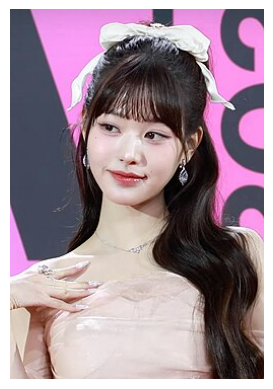


image 1/1 /content/face2.jpg: 640x448 (no detections), 12.2ms
Speed: 4.7ms preprocess, 12.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


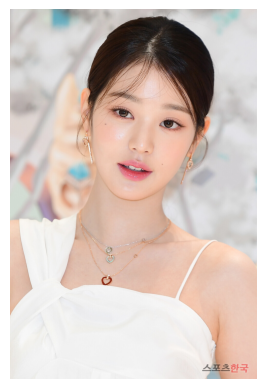

🔍 유사도 거리: 0.00
✅ 동일 인물로 추정됩니다.


In [18]:
compare_faces("face1.jpg", "face2.jpg")


image 1/1 /content/face1.jpg: 640x448 (no detections), 11.8ms
Speed: 3.9ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


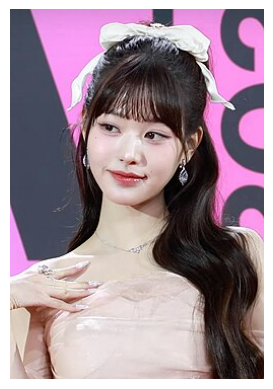


image 1/1 /content/face3.jpg: 640x512 (no detections), 52.2ms
Speed: 3.9ms preprocess, 52.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


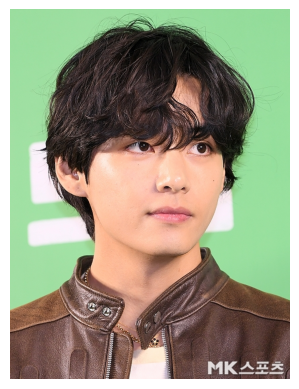

🔍 유사도 거리: 0.00
✅ 동일 인물로 추정됩니다.


In [19]:
compare_faces("face1.jpg", "face3.jpg")

In [22]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. 모델 불러오기 (학습한 best.pt 사용)
model = YOLO("/content/runs/pose/train2/weights/best.pt")  # ← 경로 꼭 확인하세요

# 2. 이미지 불러오기
image_path = "/content/face1.jpg"  # ← 여기에 테스트할 이미지 경로 입력
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 3. 예측 수행
results = model(image_rgb, show=True)  # show=True → 예측된 keypoint 시각화

# 4. keypoint 좌표 및 정보 확인
for r in results:
    if r.keypoints is not None:
        print("keypoints shape:", r.keypoints.shape)  # (1, num_keypoints, 3) → x, y, conf
        print("keypoints:", r.keypoints.xy.cpu().numpy())  # numpy 형태로 출력


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


0: 640x448 (no detections), 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)
keypoints shape: torch.Size([1, 0, 21])
keypoints: []



0: 640x448 (no detections), 22.8ms
Speed: 2.1ms preprocess, 22.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


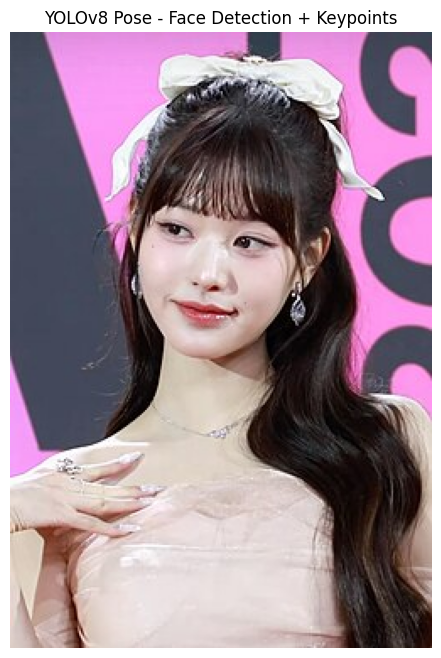

In [24]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 모델 로드
model = YOLO("/content/runs/pose/train2/weights/best.pt")  # 본인의 모델 경로로 수정

# 이미지 불러오기
image_path = "/content/face1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 예측 수행
results = model(image_rgb)

# 결과 시각화용 복사본
draw_img = image_rgb.copy()

for result in results:
    boxes = result.boxes
    keypoints = result.keypoints

    # 바운딩 박스 그리기
    if boxes is not None:
        for box in boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(draw_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # keypoint 그리기
    if keypoints is not None:
        kpts = keypoints.xy[0].cpu().numpy()  # 첫 사람 기준
        for x, y in kpts:
            cv2.circle(draw_img, (int(x), int(y)), radius=3, color=(255, 0, 0), thickness=-1)

# 시각화
plt.figure(figsize=(8, 8))
plt.imshow(draw_img)
plt.title("YOLOv8 Pose - Face Detection + Keypoints")
plt.axis("off")
plt.show()


In [25]:
import torch
from ultralytics import YOLO
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 모델 로드
model = YOLO('/content/runs/pose/train2/weights/best.pt')

# 이미지 로드 및 예측
def get_keypoints(img_path):
    img = cv2.imread(img_path)
    results = model(img)
    keypoints = results[0].keypoints

    if keypoints is None or len(keypoints.data) == 0:
        print(f"No keypoints detected in {img_path}")
        return None

    # keypoint data: [1, 7, 3] → [x1, y1, ..., x7, y7]
    kpts = keypoints.data[0][:, :2].cpu().numpy().flatten()
    return kpts

# 유사도 계산 (Cosine 또는 Euclidean)
def compare_faces(vec1, vec2):
    if vec1 is None or vec2 is None:
        return 0.0  # 비교 불가
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    return sim

# 예제: 두 이미지 경로 입력
vec1 = get_keypoints("/content/face1.jpg")
vec2 = get_keypoints("/content/face2.jpg")

similarity = compare_faces(vec1, vec2)
print(f"유사도: {similarity:.4f}")

if similarity > 0.90:
    print("✅ 동일인물로 추정")
else:
    print("❌ 다른 인물일 가능성")



0: 640x448 (no detections), 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 (no detections), 7.4ms
Speed: 3.0ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by check_pairwise_arrays.